# Getting started with using LF Energy for load flow simulations
Before first go, these commands should be run to make sure the environment is set

I am using uv to handle dependecies etc. so commands are based on this.


In [5]:
#importing the libraries
import pypowsybl as pp
import pandas as pd
import numpy as np
import matplotlib as plt
import os #to save files to path
SAVE_DIR = "Saved_results"
os.makedirs(SAVE_DIR, exist_ok=True)

In [130]:
# code to create the network
def create_9_bus_network():
    n = pp.network.create_ieee9() #creating the network based on built in network template
    buses=n.get_buses()
    print(buses)
    
    generators=n.get_generators()
    print(generators)
    
    lines=n.get_lines()
    print(lines)
    
    transformers=n.get_2_windings_transformers()
    print(transformers)
    
    loads=n.get_loads()
    print(loads)
    return n

In [131]:
#Standard way to simulate
n_base=create_9_bus_network()
results=pp.loadflow.run_ac(n_base)


      name  v_mag  v_angle  connected_component  synchronous_component  \
id                                                                       
VL1_0       104.0   0.0000                    0                      0   
VL1_1       102.5  -2.2160                    0                      0   
VL2_0       102.5   9.2800                    0                      0   
VL2_1       102.5   3.7197                    0                      0   
VL3_0       102.5   4.6647                    0                      0   
VL3_1       103.2   1.9667                    0                      0   
VL5_0        99.5  -3.9880                    0                      0   
VL6_0       101.2  -3.6870                    0                      0   
VL8_0       101.5   0.7275                    0                      0   

      voltage_level_id  
id                      
VL1_0              VL1  
VL1_1              VL1  
VL2_0              VL2  
VL2_1              VL2  
VL3_0              VL3  
VL3_1     

## Plotting results

### Topology


In [23]:
#show in notebook
n_base.get_single_line_diagram('VL1')

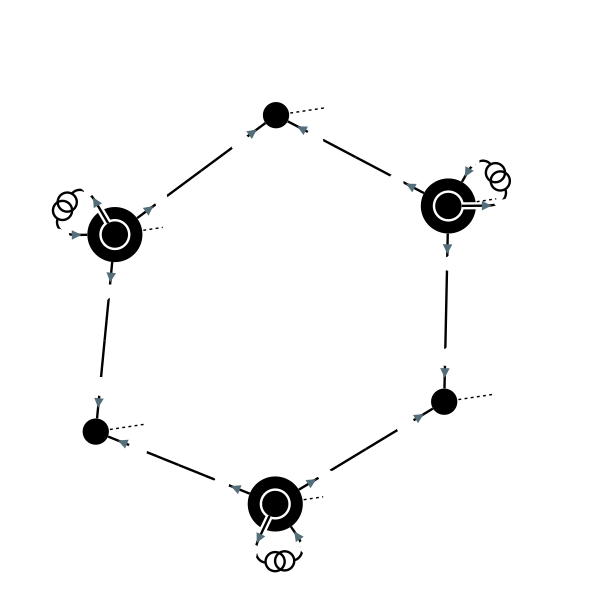

In [47]:
n_base.get_network_area_diagram()

In [28]:
#Save to file
#SLD
path=os.path.join(SAVE_DIR,'ieee9_sld.svg')
n_base.write_single_line_diagram_svg('VL1',path)

### Customizing the variables

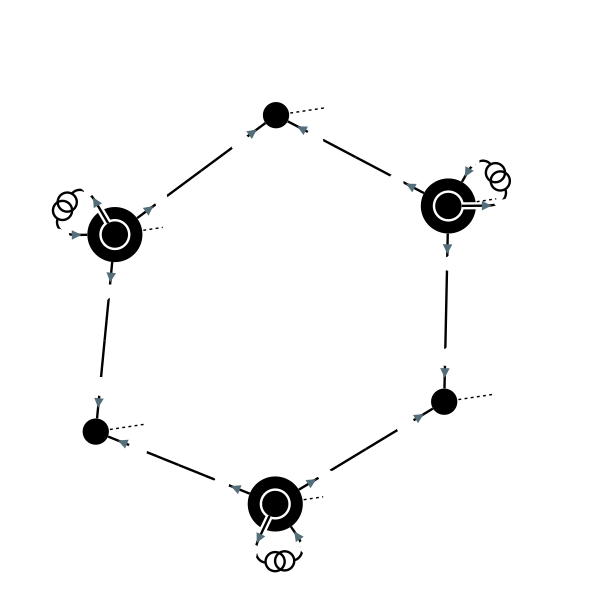

In [132]:
# Load the standard IEEE 9-bus network
n2 = pp.network.create_ieee9()
results1=pp.loadflow.run_ac(n2)
n2.get_network_area_diagram()


In [133]:
# Get components as DataFrames for modification
buses = n2.get_buses()
generators = n2.get_generators()
loads = n2.get_loads()
lines = n2.get_lines()

In [138]:
#if names are needed it can be printed as this
print(lines[['r','x']])

           r      x
id                 
L7-8-0  0.85   7.20
L9-8-0  1.19  10.08
L7-5-0  3.20  16.10
L9-6-0  3.90  17.00
L5-4-0  1.00   8.50
L6-4-0  1.70   9.20


In [182]:
# Modify generator parameters
n2.update_generators(
    id='B1-G', 
    target_p=50,  # New active power setpoint (MW)
    target_v=108,  # New voltage setpoint (pu)
    min_p=50,
    max_p=250
)
#check that it has been updated
print(f"Old: {generators[['target_p','target_v']]}")
print(f"New: {n2.get_generators()[['target_p','target_v','bus_id']]}")

# Modify load parameters
n2.update_loads(
    id='B5-L',
    p0=200,  # Active power (MW)
    q0=30   # Reactive power (MVAr)
)
print(f"Old: {loads[['p0','q0']]}")
print(f"New: {n2.get_loads()[['p0','q0']]}")
# Modify line parameters
n2.update_lines(
    id='L5-4-0',
    r=0.01,  # New resistance (pu)
    x=0.05   # New reactance (pu)
)
print(f"Old: {lines[['r','x']]}")
print(f"New: {n2.get_lines()[['r','x']]}")

Old:        target_p  target_v
id                       
B1-G   71.64102     104.0
B2-G  163.00000     102.5
B3-G   85.00000     102.5
New:       target_p  target_v bus_id
id                             
B1-G      50.0     108.0  VL1_0
B2-G     163.0     102.5  VL2_0
B3-G      85.0     102.5  VL3_0
Old:          p0    q0
id               
B5-L  125.0  50.0
B6-L   90.0  30.0
B8-L  100.0  35.0
New:          p0    q0
id               
B5-L  200.0  30.0
B6-L   90.0  30.0
B8-L  100.0  35.0
Old:            r      x
id                 
L7-8-0  0.85   7.20
L9-8-0  1.19  10.08
L7-5-0  3.20  16.10
L9-6-0  3.90  17.00
L5-4-0  1.00   8.50
L6-4-0  1.70   9.20
New:            r      x
id                 
L7-8-0  0.85   7.20
L9-8-0  1.19  10.08
L7-5-0  3.20  16.10
L9-6-0  3.90  17.00
L5-4-0  0.01   0.05
L6-4-0  1.70   9.20


In [163]:
# printing 
for index,row in lines.iterrows():
    print(f"{index}:r={round(row['r'],2)}, x={round(row['x'],2)}")

L7-8-0:r=0.85, x=7.2
L9-8-0:r=1.19, x=10.08
L7-5-0:r=3.2, x=16.1
L9-6-0:r=3.9, x=17.0
L5-4-0:r=1.0, x=8.5
L6-4-0:r=1.7, x=9.2


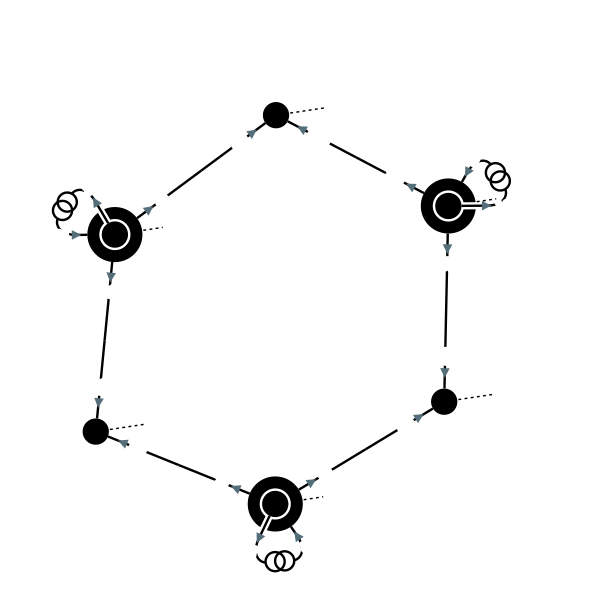

In [183]:
#re-run power flow with updated values
#n2 = pp.network.create_ieee9()
results2=pp.loadflow.run_ac(n2)
pp.loadflow.run_ac(n2)
n2.get_network_area_diagram()

In [184]:
# Print results one item at a time
voltages=n2.get_buses().v_mag
print(voltages)
#print(voltages.loc['VL1_0'])

id
VL1_0    108.000000
VL1_1    105.773323
VL2_0    102.500000
VL2_1    104.137394
VL3_0    102.500000
VL3_1    104.063950
VL5_0    105.745449
VL6_0    103.699087
VL8_0    102.874990
Name: v_mag, dtype: float64


In [178]:
print(results2[0].slack_bus_results[0].active_power_mismatch)

-4.324395319610375e-06
